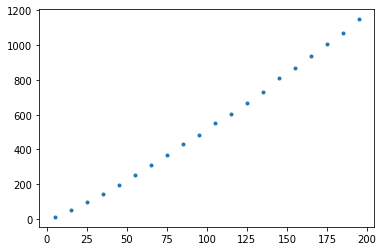

In [5]:
#!pip install matplotlib

%matplotlib inline

import random
import matplotlib.pyplot as plt
import numpy as np
#import scipy as sc
#import sympy as sp

def calc_run(N):
    S = set(range(N))
    k=0
    while S:
        a = random.randint(0,N-1)
        k+=1
        if a in S:
            S.remove(a)
    return k

def test1():
    X,Y = [],[]
    T = 1000
    for N in range(5,201,10):
        k = 0
        for t in range(T):
            k += calc_run(N)
        k/=T
        X.append(N)
        Y.append(k)
    return X,Y

def plot1():
    X,Y = test1()
    plt.plot(X,Y,".")

plot1()
